# Linear models interpretability

## Some context about ML models interpretability


![alt text](interpretability.jpg )
Figure 1. Explaining individual predictions to a human decision-maker. Source: Marco Tulio Ribeiro.

With the new European General Data Protection legislation ([GDPR](https://www.eugdpr.org/)) starting it's application from 25th May 2018, the GDPR mandates a “right to explanation” from machine learning models — meaning that those decissions based (or significantly affected) by such models should be possible to be interpreted by a human—.
<br>
Despite the fact that many machine learning models are black boxes, understanding the rationale behind the model's predictions would certainly help users decide when to trust or not to trust their predictions. An example is shown in Figure 1, in which a model predicts that a certain patient has the flu. The prediction is then explained by an "explainer" that highlights the symptoms that are most important to the model. With this information about the rationale behind the model, the doctor is now empowered to trust the model—or not.
<br>

Machine learning models interpretability is closely connected with the ability of users to understand the model. Typical criteria are:
* a small number of input features (only the necessary ones), ideally a small number of them to make a simple visualization possible,
* features fitting to user's expectation (e.g., based on a priori knowledge that can be formalized as a priori relevance),
* a simple internal processing, e.g. by understandable rules instead of a complex processing inside an Artificial Neural Network.
<br>
<br>
<br>


## Linear models

From [Wikipedia](https://en.wikipedia.org/wiki/Linear_model):
<br>
In statistics, the term linear model is used in different ways according to the context. The most common occurrence is in connection with regression models and the term is often taken as synonymous with linear regression model. However, the term is also used in time series analysis with a different meaning. In each case, the designation "linear" is used to identify a subclass of models for which substantial reduction in the complexity of the related statistical theory is possible.

### Focusing the reasoning in the Logistic Regression.

https://www.elen.ucl.ac.be/Proceedings/esann/esannpdf/es2012-7.pdf

[Interpretting model coefficients]
(https://stats.stackexchange.com/questions/20996/how-to-interpret-coefficients-from-a-logistic-regression)
<br>

[Interpretting negative coefficients]
(https://www.reddit.com/r/statistics/comments/4begf8/question_about_interpreting_negative_coefficients/)



### Starting with an example

In [63]:
# Required imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from IPython.display import Image
from IPython.display import display, HTML


In [53]:
# Load the digits dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features since we want to create a 2D plot.
Y = iris.target

In [70]:
# Classic skelarn fit/predict usage for model training and testing
logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of LogisticRegression and fit the data.
logreg.fit(X, Y)

y_hat = logreg.predict(X)

print("Training score: ",accuracy_score(Y, y_hat, normalize=True))

Training score:  0.806666666667


In [121]:
# Getting the coefficients of the model:
coefficients = pd.concat([pd.DataFrame(iris.feature_names),pd.DataFrame(np.transpose(logreg2.coef_))], axis = 1)
coefficients.columns=["attribute", iris.target_names[0], iris.target_names[1], iris.target_names[2]]
print("Logistic regression coefficients:")
coefficients

Logistic regression coefficients:


,attribute,setosa,versicolor,virginica
0,sepal length (cm),1.509238,-0.252331,-2.466856
1,sepal width (cm),4.907718,-2.779020,-6.636762
2,petal length (cm),-7.784084,1.298870,9.357986
3,petal width (cm),-3.806355,-2.703548,18.143379


Understanding what is the set of attributes that the model is using and what are the coefficients asociated to each of those attribute in the model might be a sufficient condition for interpreting the results.

### Interpreting the results. Extracting the decission boundary

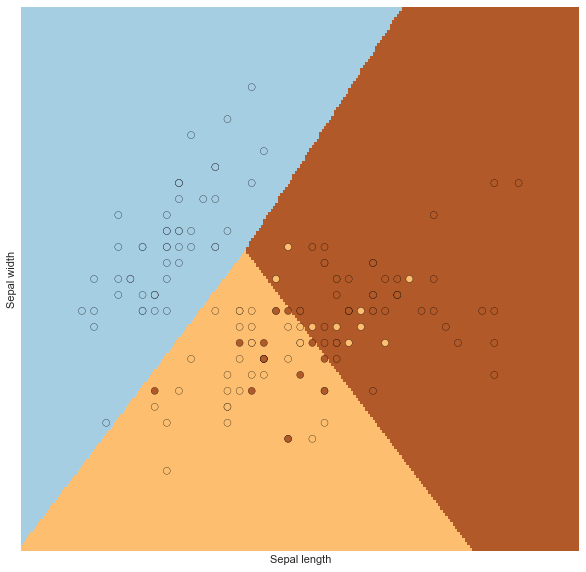

In [78]:
h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 10))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

For a simple example like this one, the logistic model fullfills one of the basic requirements stated above, that refers to the posibility for the model parameters to be plotted into a simple plot.

## Final conclusions
**In the end, machine learning models interpretability refers to the ability of a given human to understand why the model is behaving like it is doing. Having said that, clearly, model interpretability depends on the expertise of the human that need to explain how the model is taking a given decission, but it's also evident that certain models will be easier to interpret by an individual with no experience in the use of Machine Learning or advanced mathematical models**
<br>

**Linear models are interpretable from the point of view that they don't need to be treated as black boxes (just trying to infer the reasoning by comparing the output got for each input).**